In [1]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd

In [2]:
salary = Series([25000, 22000, 28000, 26500, 32000], index=['a', 'b', 'c', 'd', 'e'])
print(salary)

a    25000
b    22000
c    28000
d    26500
e    32000
dtype: int64


In [3]:
c = salary

In [4]:
# select specific value
print(c['b'])



22000


In [5]:
# check index and values
print(c.index)
print(c.values)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[25000 22000 28000 26500 32000]


In [6]:

# apply condition
print(c[c <= 25000])

a    25000
b    22000
dtype: int64


In [7]:
data = pd.read_csv(r"/work/day.csv", sep=";", delimiter=",")


In [8]:
data.head(5)

,index,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
nan = np.nan
d = pd.DataFrame( { 'category' :  ['electronics', 'men"s clothing', 'womens clothing' ], 'sales-in-units' : np.array([nan, 3,5]), 'date': pd.Timestamp('20230107'),'# of customers': np.array([nan, nan, nan])})


In [10]:
d

,category,sales-in-units,date,# of customers
0,electronics,NaN,2023-01-07,NaN
1,"men""s clothing",3.0,2023-01-07,NaN
2,womens clothing,5.0,2023-01-07,NaN


In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   category        3 non-null      object        
 1   sales-in-units  2 non-null      float64       
 2   date            3 non-null      datetime64[ns]
 3   # of customers  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 224.0+ bytes


In [12]:
print(d.dropna(axis=0))  # type 1/get columnsd

Empty DataFrame
Columns: [category, sales-in-units, date, # of customers]
Index: []


In [13]:
print(d.dropna(axis=1, how='all'))  # remove column with all missing values

          category  sales-in-units       date
0      electronics             NaN 2023-01-07
1   men"s clothing             3.0 2023-01-07
2  womens clothing             5.0 2023-01-07


In [14]:
print(d.dropna(axis=0, how='all'))  # remove row with all missing values

          category  sales-in-units       date  # of customers
0      electronics             NaN 2023-01-07             NaN
1   men"s clothing             3.0 2023-01-07             NaN
2  womens clothing             5.0 2023-01-07             NaN


In [15]:
print(d.dropna(thresh=3))   # type 2

          category  sales-in-units       date  # of customers
1   men"s clothing             3.0 2023-01-07             NaN
2  womens clothing             5.0 2023-01-07             NaN


In [16]:
print(d.dropna(how='any'))  # type 1/any row having missing value

Empty DataFrame
Columns: [category, sales-in-units, date, # of customers]
Index: []


In [17]:
left_df2 = pd.DataFrame( { 'category' : ( ['electronics', 'men"s clothing', 'womens clothing' ]), 'sales-in-morning' : np.array([1, 6, 6])})

In [18]:
right_df2 = pd.DataFrame( { 'category' : ( ['electronics', 'men"s clothing', 'womens clothing', ]),'sales-in-evening' : np.array([3, 7, 2])})

In [19]:
d2 = pd.merge(left_df2, right_df2, on='category', how='left')

In [20]:
d2

,category,sales-in-morning,sales-in-evening
0,electronics,1,3
1,"men""s clothing",6,7
2,womens clothing,6,2


In [21]:
d2.rename(columns = {'sales-in-units_x':'Morning', 'sales-in-units_y':'Eveniing'}, inplace = True)
print(d2)

          category  sales-in-morning  sales-in-evening
0      electronics                 1                 3
1   men"s clothing                 6                 7
2  womens clothing                 6                 2


In [22]:
d3 = pd.DataFrame( {"a":['one','two','thr','four'],'b': [4,5,1,2], 'c': [8,7,6,9],'d': [6,1,3,4]} )

In [23]:
d3

,a,b,c,d
0,one,4,8,6
1,two,5,7,1
2,thr,1,6,3
3,four,2,9,4


In [24]:
d4 = pd.DataFrame( {"a":['two','thr','four','five'],'b': [7,0,1,2], 'c': [10,70,60,90], 'd': [60,10,30,40]} )

In [25]:
d4

,a,b,c,d
0,two,7,10,60
1,thr,0,70,10
2,four,1,60,30
3,five,2,90,40


In [26]:
d5 = pd.merge(d3, d4, on='a')

In [27]:
d5

,a,b_x,c_x,d_x,b_y,c_y,d_y
0,two,5,7,1,7,10,60
1,thr,1,6,3,0,70,10
2,four,2,9,4,1,60,30


In [28]:
# Replace methods
d6 = pd.DataFrame( { 'one': pd.Series([5,6,7,8,9], index=['a','b','c','d','e']),'two': pd.Series([11,12,13,14,15], index = ['m','n','o','p','q'])  })


In [29]:
d6

,one,two
a,5.0,NaN
b,6.0,NaN
c,7.0,NaN
d,8.0,NaN
e,9.0,NaN
m,NaN,11.0
n,NaN,12.0
o,NaN,13.0
p,NaN,14.0
q,NaN,15.0


In [30]:

print(d6.replace([5, 13], [500, 1300]))

     one     two
a  500.0     NaN
b    6.0     NaN
c    7.0     NaN
d    8.0     NaN
e    9.0     NaN
m    NaN    11.0
n    NaN    12.0
o    NaN  1300.0
p    NaN    14.0
q    NaN    15.0


In [31]:
# adding column in dataframe
d7 = pd.DataFrame( { 'category' : ( ['electronics', 'men"s clothing', 'womens clothing' ]),  'sales-in-units' : np.array([1, 6, 6])})


In [32]:
d7

,category,sales-in-units
0,electronics,1
1,"men""s clothing",6
2,womens clothing,6


In [33]:
new_col = {'electronics': 50, 'men"s clothing': 55,  'womens clothing' : 65}

In [34]:
d7['num of customers'] = d7['category'].map(new_col)

In [35]:
d7

,category,sales-in-units,num of customers
0,electronics,1,50
1,"men""s clothing",6,55
2,womens clothing,6,65


In [36]:
# ordering columns
d8 = d7[['num of customers','category','sales-in-units']]

In [37]:
d8

,num of customers,category,sales-in-units
0,50,electronics,1
1,55,"men""s clothing",6
2,65,womens clothing,6


In [38]:
# creating a timestamp

d9 = pd.Timestamp('20210616')
print(d9)

2021-06-16 00:00:00


In [39]:
d10 = pd.date_range('20230105', '20230106', freq='H')
print(d10)

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               '2023-01-05 10:00:00', '2023-01-05 11:00:00',
               '2023-01-05 12:00:00', '2023-01-05 13:00:00',
               '2023-01-05 14:00:00', '2023-01-05 15:00:00',
               '2023-01-05 16:00:00', '2023-01-05 17:00:00',
               '2023-01-05 18:00:00', '2023-01-05 19:00:00',
               '2023-01-05 20:00:00', '2023-01-05 21:00:00',
               '2023-01-05 22:00:00', '2023-01-05 23:00:00',
               '2023-01-06 00:00:00'],
              dtype='datetime64[ns]', freq='H')


In [40]:
rng2 = pd.date_range("2023-01-01", "2024-01-01", freq="W")

In [41]:
rng2

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28', '2023-06-04', '2023-06-11',
               '2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09',
               '2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17', '2023-09-24', '2023-10-01',
               '2023-10-08', '2023-10-15', '2023-10-22', '2023-10-29',
               '2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26',
               '2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='W-S

In [42]:
df = pd.read_csv("/work/d.csv")

In [43]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [46]:

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [47]:
df.shape

(53940, 10)

In [48]:
df.size

539400

In [49]:
# finding missing data (True / false)
e5 = pd.isna(df)
print(e5)


       carat    cut  color  clarity  depth  table  price      x      y      z
0      False  False  False    False  False  False  False  False  False  False
1      False  False  False    False  False  False  False  False  False  False
2      False  False  False    False  False  False  False  False  False  False
3      False  False  False    False  False  False  False  False  False  False
4      False  False  False    False  False  False  False  False  False  False
...      ...    ...    ...      ...    ...    ...    ...    ...    ...    ...
53935  False  False  False    False  False  False  False  False  False  False
53936  False  False  False    False  False  False  False  False  False  False
53937  False  False  False    False  False  False  False  False  False  False
53938  False  False  False    False  False  False  False  False  False  False
53939  False  False  False    False  False  False  False  False  False  False

[53940 rows x 10 columns]


In [50]:
# random location from rows
e6 = df[ 100: 120]
print(e6)

     carat        cut color clarity  depth  table  price     x     y     z
100   0.75  Very Good     D     SI1   63.2   56.0   2760  5.80  5.75  3.65
101   0.75    Premium     E     SI1   59.9   54.0   2760  6.00  5.96  3.58
102   0.74      Ideal     G     SI1   61.6   55.0   2760  5.80  5.85  3.59
103   0.75    Premium     G     VS2   61.7   58.0   2760  5.85  5.79  3.59
104   0.80      Ideal     I     VS1   62.9   56.0   2760  5.94  5.87  3.72
105   0.75      Ideal     G     SI1   62.2   55.0   2760  5.87  5.80  3.63
106   0.80    Premium     G     SI1   63.0   59.0   2760  5.90  5.81  3.69
107   0.74      Ideal     I    VVS2   62.3   55.0   2761  5.77  5.81  3.61
108   0.81      Ideal     F     SI2   58.8   57.0   2761  6.14  6.11  3.60
109   0.59      Ideal     E    VVS2   62.0   55.0   2761  5.38  5.43  3.35
110   0.80      Ideal     F     SI2   61.4   57.0   2761  5.96  6.00  3.67
111   0.74      Ideal     E     SI2   62.2   56.0   2761  5.80  5.84  3.62
112   0.90    Premium    

In [51]:
# extract sungle column
e7 = df["cut"][110:121]
print(e7)

110        Ideal
111        Ideal
112      Premium
113    Very Good
114        Ideal
115        Ideal
116      Premium
117        Ideal
118        Ideal
119        Ideal
120        Ideal
Name: cut, dtype: object


In [52]:
# extract multiple columns
e8 = df[["cut", "color", 'depth']][110:121]
print(e8)

           cut color  depth
110      Ideal     F   61.4
111      Ideal     E   62.2
112    Premium     I   63.0
113  Very Good     G   62.2
114      Ideal     F   62.6
115      Ideal     F   62.7
116    Premium     F   61.7
117      Ideal     G   62.4
118      Ideal     E   60.7
119      Ideal     F   59.9
120      Ideal     D   62.3


In [53]:
# frequency distribution of columns in case of categorical values
e9 = df["cut"].value_counts()
print(e9)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [54]:
e10 = df["color"].value_counts()
print(e10)

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)


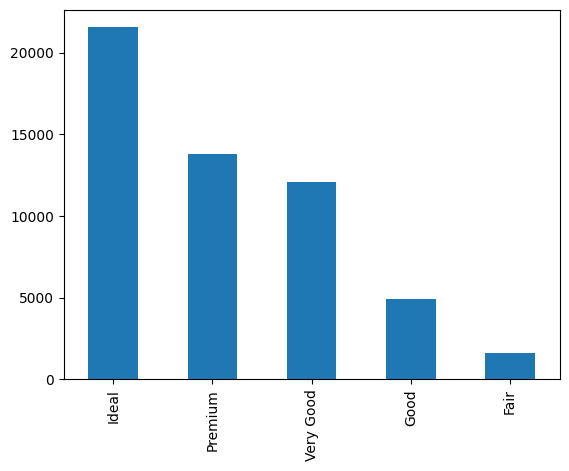

In [56]:
# frequency plotting
print(e9.plot(kind="bar"))



AxesSubplot(0.125,0.11;0.775x0.77)


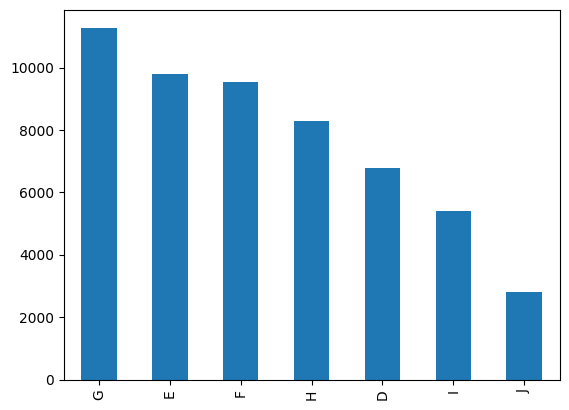

In [57]:
print(e10.plot(kind="bar"))

In [58]:
# fatorize and unique
e11 = pd.unique(df['cut'])
print(e11)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [59]:
e12 = pd.factorize(df['cut'])
print(e12)

(array([0, 1, 2, ..., 3, 1, 0]), Index(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype='object'))


In [61]:
# rearranging data based on single column / data sorting
e13 = df.sort_values(["table"])
print(e13)

       carat        cut color clarity  depth  table  price     x     y     z
11368   1.04      Ideal     I     VS1   62.9   43.0   4997  6.45  6.41  4.04
35633   0.29  Very Good     E     VS1   62.8   44.0    474  4.20  4.24  2.65
5979    1.00       Fair     I     VS1   64.0   49.0   3951  6.43  6.39  4.10
22701   0.30       Fair     E     SI1   64.5   49.0    630  4.28  4.25  2.75
25179   2.00       Fair     H     SI1   61.2   50.0  13764  8.17  8.08  4.97
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
52861   0.50       Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09
52860   0.50       Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09
51342   0.79       Fair     G     SI1   65.3   76.0   2362  5.52  5.13  3.35
50773   0.81       Fair     F     SI2   68.8   79.0   2301  5.26  5.20  3.58
24932   2.01       Fair     F     SI1   58.6   95.0  13387  8.32  8.31  4.87

[53940 rows x 10 columns]


In [62]:
e14 = df.sort_values(["clarity"])
e15 = e14["clarity"].to_list()
print(e15[:50])

['I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1', 'I1']


In [63]:
# using astype
e16 = df['carat']
e17 = e16.astype(int)
print(e17)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Name: carat, Length: 53940, dtype: int64


In [64]:

e18 = e16.round(2)
print(e18)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [65]:
e18 = e16.round(2)
print(e18)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [66]:
# creating subdataset
e19 = df[['carat', 'cut', 'color', 'clarity']]
print(e19.head())

   carat      cut color clarity
0   0.23    Ideal     E     SI2
1   0.21  Premium     E     SI1
2   0.23     Good     E     VS1
3   0.29  Premium     I     VS2
4   0.31     Good     J     SI2


In [67]:
# find some basic results using for loop
col=['x', 'y', 'z']
for j in col:
    m = np.mean(df[j])
    print("column name: ", j)
    print("mean value: ", m)
    print("============")

column name:  x
mean value:  5.731157211716722
column name:  y
mean value:  5.734525954764553
column name:  z
mean value:  3.5387337782721544


In [68]:
dt = pd.read_csv("/work/day.csv")
print(dt.columns)

Index(['index', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [70]:
# creating subset
f1 = dt[['weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
print(f1.head())


   weathersit      temp     atemp       hum  windspeed
0           2  0.344167  0.363625  0.805833   0.160446
1           2  0.363478  0.353739  0.696087   0.248539
2           1  0.196364  0.189405  0.437273   0.248309
3           1  0.200000  0.212122  0.590435   0.160296
4           1  0.226957  0.229270  0.436957   0.186900


In [71]:
print(f1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weathersit  731 non-null    int64  
 1   temp        731 non-null    float64
 2   atemp       731 non-null    float64
 3   hum         731 non-null    float64
 4   windspeed   731 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.7 KB
None


In [72]:
f2 = dt.drop(columns = ['weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])
print(f2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    731 non-null    int64 
 1   dteday   731 non-null    object
 2   season   731 non-null    int64 
 3   yr       731 non-null    int64 
 4   mnth     731 non-null    int64 
 5   holiday  731 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.4+ KB
None


In [74]:
dt.head(5)

,index,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [73]:
# query
f3 = dt.query("temp > atemp")
print(f3)

     index      dteday  season  yr  mnth  holiday  weekday  workingday  \
1        2    1/2/2011       1   0     1        0        0           0   
2        3    1/3/2011       1   0     1        0        1           1   
7        8    1/8/2011       1   0     1        0        6           0   
8        9    1/9/2011       1   0     1        0        0           0   
11      12   1/12/2011       1   0     1        0        3           1   
..     ...         ...     ...  ..   ...      ...      ...         ...   
721    722  12/22/2012       1   1    12        0        6           0   
725    726  12/26/2012       1   1    12        0        3           1   
726    727  12/27/2012       1   1    12        0        4           1   
728    729  12/29/2012       1   1    12        0        6           0   
729    730  12/30/2012       1   1    12        0        0           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
1             2  0.363478  0.35

In [75]:
# selecting specific data types, exclude
f4 = dt.select_dtypes(exclude='int64')
print(f4)

         dteday      temp     atemp       hum  windspeed
0      1/1/2011  0.344167  0.363625  0.805833   0.160446
1      1/2/2011  0.363478  0.353739  0.696087   0.248539
2      1/3/2011  0.196364  0.189405  0.437273   0.248309
3      1/4/2011  0.200000  0.212122  0.590435   0.160296
4      1/5/2011  0.226957  0.229270  0.436957   0.186900
..          ...       ...       ...       ...        ...
726  12/27/2012  0.254167  0.226642  0.652917   0.350133
727  12/28/2012  0.253333  0.255046  0.590000   0.155471
728  12/29/2012  0.253333  0.242400  0.752917   0.124383
729  12/30/2012  0.255833  0.231700  0.483333   0.350754
730  12/31/2012  0.215833  0.223487  0.577500   0.154846

[731 rows x 5 columns]


In [76]:
# selecting specific data types, include
f41 = dt.select_dtypes(include='int64')
print(f41)

     index  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1       1   0     1        0        6           0           2   
1        2       1   0     1        0        0           0           2   
2        3       1   0     1        0        1           1           1   
3        4       1   0     1        0        2           1           1   
4        5       1   0     1        0        3           1           1   
..     ...     ...  ..   ...      ...      ...         ...         ...   
726    727       1   1    12        0        4           1           2   
727    728       1   1    12        0        5           1           2   
728    729       1   1    12        0        6           0           2   
729    730       1   1    12        0        0           0           1   
730    731       1   1    12        0        1           1           2   

     casual  registered   cnt  
0       331         654   985  
1       131         670   801  
2       120    

In [77]:
f41 = dt.select_dtypes(include='float64')
print(f41)

         temp     atemp       hum  windspeed
0    0.344167  0.363625  0.805833   0.160446
1    0.363478  0.353739  0.696087   0.248539
2    0.196364  0.189405  0.437273   0.248309
3    0.200000  0.212122  0.590435   0.160296
4    0.226957  0.229270  0.436957   0.186900
..        ...       ...       ...        ...
726  0.254167  0.226642  0.652917   0.350133
727  0.253333  0.255046  0.590000   0.155471
728  0.253333  0.242400  0.752917   0.124383
729  0.255833  0.231700  0.483333   0.350754
730  0.215833  0.223487  0.577500   0.154846

[731 rows x 4 columns]


In [79]:
# f41 = dt.select_dtypes(include='float32')
# print(f41)

In [80]:
f5 = dt['cnt']
f2.insert(3, "new col", f5) # location,data_position,ur_data
print(f2)

     index      dteday  season  new col  yr  mnth  holiday
0        1    1/1/2011       1      985   0     1        0
1        2    1/2/2011       1      801   0     1        0
2        3    1/3/2011       1     1349   0     1        0
3        4    1/4/2011       1     1562   0     1        0
4        5    1/5/2011       1     1600   0     1        0
..     ...         ...     ...      ...  ..   ...      ...
726    727  12/27/2012       1     2114   1    12        0
727    728  12/28/2012       1     3095   1    12        0
728    729  12/29/2012       1     1341   1    12        0
729    730  12/30/2012       1     1796   1    12        0
730    731  12/31/2012       1     2729   1    12        0

[731 rows x 7 columns]


In [81]:
# put a boolean condition...where function
f6 = f2['new col'].where(f2['new col'] > 3000)
print(f6)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
726       NaN
727    3095.0
728       NaN
729       NaN
730       NaN
Name: new col, Length: 731, dtype: float64


In [82]:
# filtering data by is-in function
a1 = [1,3]
f7 = dt[dt.weekday.isin(a1)]

In [83]:
f7

,index,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
11,12,1/12/2011,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162
16,17,1/17/2011,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,12/17/2012,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585
718,719,12/19/2012,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
723,724,12/24/2012,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
725,726,12/26/2012,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441


In [85]:
f2

,index,dteday,season,new col,yr,mnth,holiday
0,1,1/1/2011,1,985,0,1,0
1,2,1/2/2011,1,801,0,1,0
2,3,1/3/2011,1,1349,0,1,0
3,4,1/4/2011,1,1562,0,1,0
4,5,1/5/2011,1,1600,0,1,0
...,...,...,...,...,...,...,...
726,727,12/27/2012,1,2114,1,12,0
727,728,12/28/2012,1,3095,1,12,0
728,729,12/29/2012,1,1341,1,12,0
729,730,12/30/2012,1,1796,1,12,0


In [84]:
# replace method
f8 = f2['season'].replace(1, 100) #(value_replace,new_value_insert)
print(f8.head())

0    100
1    100
2    100
3    100
4    100
Name: season, dtype: int64


In [86]:
f9 = f2['season'].replace(1, 'nan')
print(f9.head())

0    nan
1    nan
2    nan
3    nan
4    nan
Name: season, dtype: object


In [87]:
# groupby
f10 = f2.groupby("season")['new col'].sum()
print(f10)

season
1     471348
2     918589
3    1061129
4     841613
Name: new col, dtype: int64


In [88]:
# crosstab/ count data crosstab
f11 = pd.crosstab(dt['season'], dt['weathersit'])
print(f11)

weathersit    1   2   3
season                 
1           111  66   4
2           113  68   3
3           136  48   4
4           103  65  10


In [89]:
# separate data by value count
f12 = pd.cut(dt['temp'], bins = 5).value_counts()
print(f12)

(0.22, 0.38]      194
(0.541, 0.701]    194
(0.38, 0.541]     173
(0.701, 0.862]    127
(0.0583, 0.22]     43
Name: temp, dtype: int64


In [90]:
# describe the data
f13 = dt['temp'].describe()
print(f13)

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64


In [91]:
# nlargest and nsmallest
f14 = dt.nlargest(5, "temp")
f15 = dt.nsmallest(5, "temp")
print(f14)


     index     dteday  season  yr  mnth  holiday  weekday  workingday  \
553    554   7/7/2012       3   1     7        0        6           0   
203    204  7/23/2011       3   0     7        0        6           0   
202    203  7/22/2011       3   0     7        0        5           1   
209    210  7/29/2011       3   0     7        0        5           1   
545    546  6/29/2012       3   1     6        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
553           1  0.861667  0.804913  0.492083   0.163554    1448        3392   
203           1  0.849167  0.804287  0.500000   0.131221     987        2298   
202           1  0.848333  0.840896  0.580417   0.133100     562        2825   
209           1  0.838333  0.785967  0.542500   0.174138     670        3176   
545           1  0.834167  0.786613  0.488750   0.165417     829        4634   

      cnt  
553  4840  
203  3285  
202  3387  
209  3846  
545  5463  


In [92]:
print(f15)

     index     dteday  season  yr  mnth  holiday  weekday  workingday  \
21      22  1/22/2011       1   0     1        0        6           0   
22      23  1/23/2011       1   0     1        0        0           0   
23      24  1/24/2011       1   0     1        0        1           1   
368    369   1/4/2012       1   1     1        0        3           1   
407    408  2/12/2012       1   1     2        0        0           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
21            1  0.059130  0.079070  0.400000   0.171970      93         888   
22            1  0.096522  0.098839  0.436522   0.246600     150         836   
23            1  0.097391  0.117930  0.491739   0.158330      86        1330   
368           2  0.107500  0.119337  0.414583   0.184700      95        2273   
407           1  0.127500  0.101658  0.464583   0.409212      73        1456   

      cnt  
21    981  
22    986  
23   1416  
368  2368  
407  1529  


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb3a9c3a-01de-4ac2-99e0-213c14b1ce40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>